In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr


In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics


In [44]:
import pandas as pd 
df = pd.read_csv("AAPL.csv") 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,228.410004,229.179993,226.630005,228.360001,224.870499,27390100
1,2018-09-05,228.990005,229.669998,225.100006,226.869995,223.403275,33333000
2,2018-09-06,226.229996,227.350006,221.300003,223.100006,219.690903,34290000
3,2018-09-07,221.850006,225.369995,220.710007,221.300003,217.918411,37619800
4,2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500


In [13]:
df.shape

(251, 7)

In [18]:
df.describe()



,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,192.406892,194.457411,190.371713,192.402869,190.745326,3.273491e+07
std,21.356275,21.493115,21.200308,21.263130,21.009404,1.386580e+07
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.805000,175.934998,173.555000,174.794998,173.366134,2.320120e+07
50%,196.419998,198.850006,193.820007,197.000000,195.501465,2.977340e+07
75%,207.574997,209.194999,205.274994,207.610001,206.495002,3.890535e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,9.624670e+07


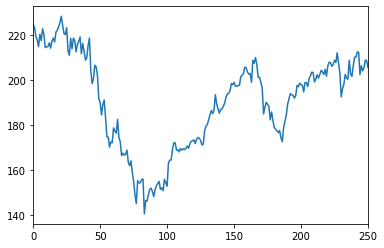

In [19]:
df["Adj Close"].plot()



In [20]:
df.set_index("Date", inplace=True)


In [43]:
window_size=32
num_samples=len(df)-window_size

indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df['Adj Close'].values[indices] 
x = data[:,:-1] 
y = data[:,-1] 

In [23]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [24]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [25]:
y_test.shape


(44,)

In [45]:
def get_performance (model_pred):
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

In [27]:
y_pred_lag=np.roll(y_test,1)


In [28]:
get_performance(y_pred_lag)


Mean Absolute Error: 2.8128
Mean Squared Error: 13.6771
Root Mean Squared Error: 3.6983


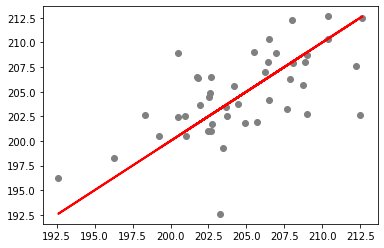

In [29]:
get_plot(y_pred_lag)


In [30]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred_lr=model_lr.predict(x_test)


In [32]:
get_performance(y_pred_lr)


Mean Absolute Error: 2.9705
Mean Squared Error: 14.6009
Root Mean Squared Error: 3.8211


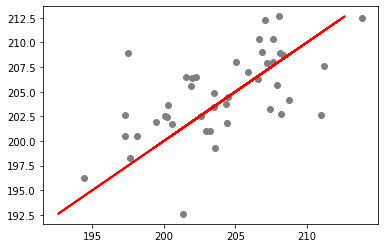

In [33]:
get_plot(y_pred_lr)


In [34]:
get_performance(y_pred_lr)


Mean Absolute Error: 2.9705
Mean Squared Error: 14.6009
Root Mean Squared Error: 3.8211


In [46]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

y_pred_ridge=model_ridge.predict(x_test)

In [47]:
get_performance(y_pred_ridge)


Mean Absolute Error: 2.9697
Mean Squared Error: 14.5967
Root Mean Squared Error: 3.8206


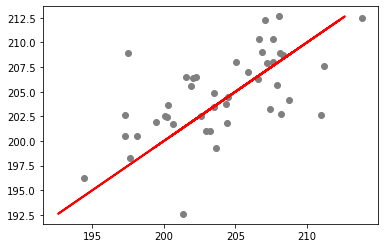

In [48]:
get_plot(y_pred_ridge)


In [49]:
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

y_pred_gb = model_gb.predict(x_test)

In [39]:
get_performance(y_pred_gb)


Mean Absolute Error: 3.5785
Mean Squared Error: 20.1579
Root Mean Squared Error: 4.4898


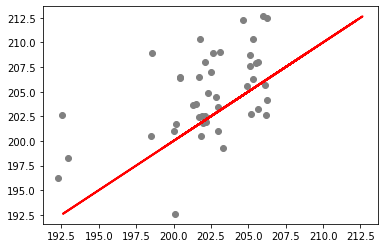

In [40]:
get_plot(y_pred_gb)


In [41]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "gb":np.absolute(y_test-y_pred_gb)})

(9, 20)

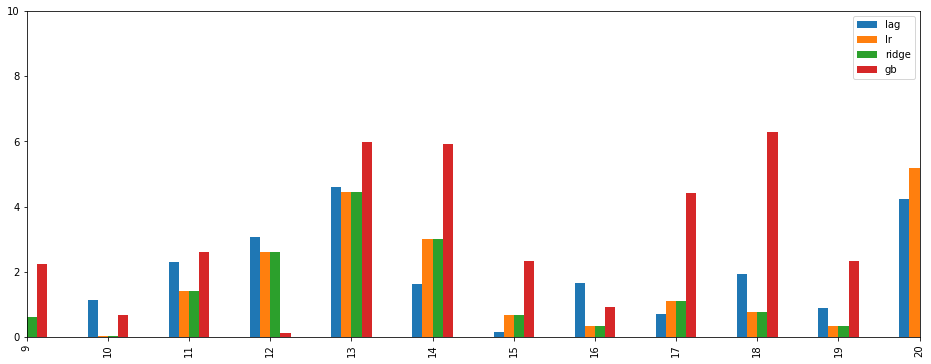

In [42]:
df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,10)
plt.xlim(9,20)